In [1]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch 
import torchvision
from torchvision import transforms, datasets

In [6]:
training = datasets.MNIST("",train = True, download = True,
                         transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("",train = False, download = True,
                         transform = transforms.Compose([transforms.ToTensor()]))

10.2%

100.0%


Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw



100.0%

Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw




73.5%

100.0%


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw



100.0%

Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw



In [8]:
trainset = torch.utils.data.DataLoader(training, batch_size =10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size =10, shuffle=True)

In [9]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [11]:
#data[0][0] means [0] is the image and [0] means from image select first image
#data[1][0] means [1] is the label of image and [0] means from image label select first image label
x,y= data[0][0], data[1][0]
print(y)

tensor(2)


In [14]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


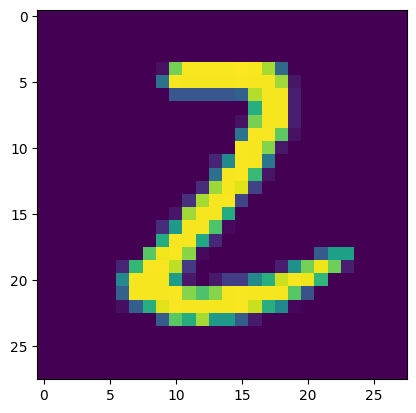

In [15]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))
plt.show()

In [18]:
#count the total numbers of images of each numbers from 0 to 0
total =0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
    xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [19]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total *100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [20]:
import torch.nn as nn
import torch.nn.functional as F

In [22]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,64) #fully connected linear network
        self.fc2 = nn.Linear(64,64) #fully connected linear network
        self.fc3 = nn.Linear(64,64) #fully connected linear network
        self.fc4 = nn.Linear(64,10) #fully connected linear network
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [26]:
X = torch.rand((28,28))
X = X.view(-1,28*28)

In [27]:
output = net(X)

In [28]:
output

tensor([[-2.1989, -2.2979, -2.2964, -2.2829, -2.2604, -2.2963, -2.2849, -2.3804,
         -2.3662, -2.3761]], grad_fn=<LogSoftmaxBackward0>)

In [30]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCH =3

for epoch in range(EPOCH):
    for data in trainset:
        #data is a batch of featuresets and labels
        X,y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
print(loss)

tensor(0.0007, grad_fn=<NllLossBackward0>)


In [32]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1,784))
        for idx,i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy:" , round(correct/total,3))

Accuracy: 0.978


In [33]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

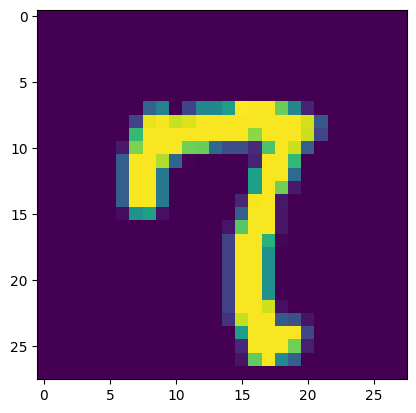

In [38]:
import matplotlib.pyplot as plt
plt.imshow(X[1].view(28,28))
plt.show()

In [37]:
print(torch.argmax(net(X[1].view(-1,784))[0]))

tensor(7)
